### Part 1

In this part, we will code a perceptron. It is simply a single node neural network which processes weighted inputs and performs binary classification. 


- Read up on perceptron algorithm. (https://en.wikipedia.org/wiki/Perceptron#Learning_algorithm_for_a_single-layer_perceptron).
- Create an object class caled perceptron. 
- Train your perceptron using the following different datasets and report the test losses.
- Create an animation of how the decision boundary is updated over the iterations. *You can use any library for this viualization*
- We will use toy datasets for the problem. Set aside 20% of samples from each dataset for testing.
    - **Xlin_sep.npy** and **ylin_sep.npy**. This dataset is linearly separable. Run your algorithm for this data, and you should achieve 100% train and test accuracies!
    - **Xlinnoise_sep.npy** and **ylinnoise_sep.npy**. This dataset is not linearly separable and contains noise. Run your algorithm for this data and observe what happens to the decision boundary in the animation. You should get a test accuracy over 80%.
    - **circles_x.npy** and **circles_y.npy**. This dataset is non-linear. Devise a strategy to make the dataset separable linearly. *(Hint: Polynomial Features)*. Plot the decision boundary showing how the two classes are separated.



In [10]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=5):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None

    def train(self, X, y, plot_epochs=False):
        num_samples, num_features = X.shape

        X = np.concatenate((np.ones((num_samples, 1)), X), axis=1)

        self.weights = np.zeros(num_features + 1)

        if plot_epochs:
            plt.figure(figsize=(12, 8))
            plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, marker='o')

        for epoch in range(self.epochs):
            for i in range(num_samples):
                prediction = np.dot(self.weights, X[i])
                update = self.learning_rate * (y[i] - prediction)
                self.weights += update * X[i]

            if plot_epochs:
                self.plot_decision_boundary(X, y, epoch)

        if plot_epochs:
            plt.title("Decision Boundaries during Training")
            plt.xlabel("Feature 1")
            plt.ylabel("Feature 2")
            plt.show()

    def plot_decision_boundary(self, X, y, epoch):
        plt.subplot(2, 3, epoch + 1)

        plt.scatter(X[:, 1], X[:, 2], c=y, cmap=plt.cm.Paired, marker='o')

        x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1

        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        Z = np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], self.weights)
        Z = np.sign(Z.reshape(xx.shape))

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
        plt.title(f'Epoch {epoch + 1}')

    def predict(self, X):
        if self.weights is None:
            raise ValueError("Perceptron not trained. Call train() first.")

        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)


        predictions = np.dot(X, self.weights)
        return np.sign(predictions)

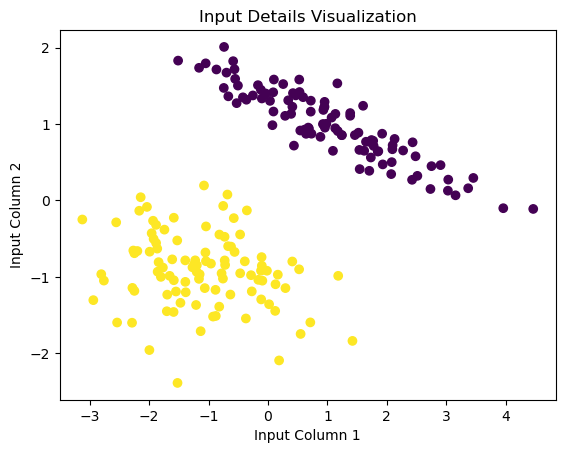

In [11]:
import numpy as np
import matplotlib.pyplot as plt

input_details = np.load('/Users/nasibhuseynzade/Desktop/Uni/Lab/Xlin_sep.npy')
output_labels = np.load('/Users/nasibhuseynzade/Desktop/Uni/Lab/ylin_sep.npy')

input_column1 = input_details[:, 0]
input_column2 = input_details[:, 1]

plt.scatter(input_column1, input_column2, c=output_labels, cmap='viridis')
plt.title('Input Details Visualization')
plt.xlabel('Input Column 1')
plt.ylabel('Input Column 2')
plt.show()




/var/folders/fp/zkb1xvsx6s1gy5dwtqm90krc0000gn/T/ipykernel_44500/2537173175.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, epoch + 1)


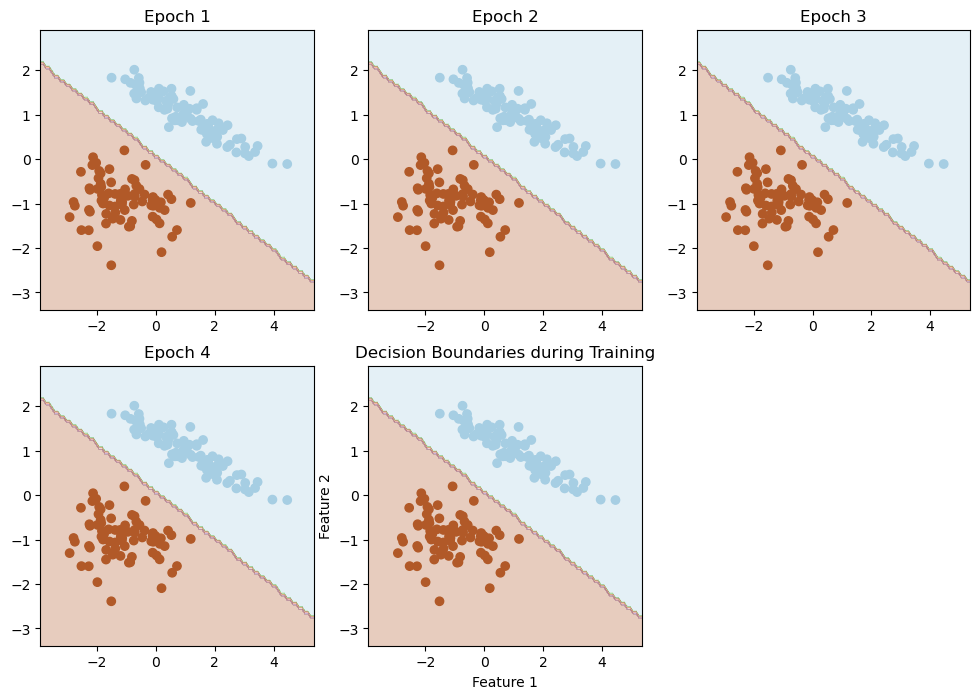

Predictions: [-1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.
  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1.
  1. -1.  1. -1.]
100.0


In [13]:
from sklearn.model_selection import train_test_split

X = np.load('/Users/nasibhuseynzade/Desktop/Uni/Lab/Xlin_sep.npy')
y = np.load('/Users/nasibhuseynzade/Desktop/Uni/Lab/ylin_sep.npy')

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)


perceptron = Perceptron(learning_rate=0.1, epochs=5)
perceptron.train(X_train, y_train, plot_epochs=True)


predictions = perceptron.predict(X_test)


print("Predictions:", predictions)

accuracy = np.mean(predictions == y_test) * 100
print(accuracy)

/var/folders/fp/zkb1xvsx6s1gy5dwtqm90krc0000gn/T/ipykernel_44500/2537173175.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, epoch + 1)


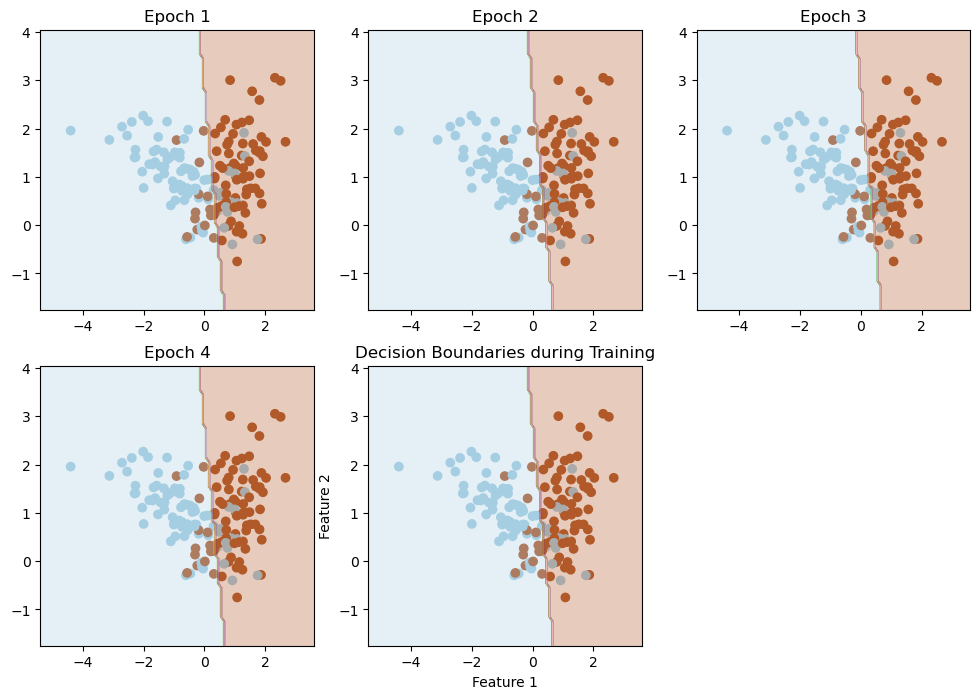

Predictions: [-1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.
 -1. -1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1. -1. -1.
 -1. -1. -1.  1.]
82.5


In [14]:

X = np.load('/Users/nasibhuseynzade/Desktop/Uni/Lab/Xlinnoise_sep.npy')
y = np.load('/Users/nasibhuseynzade/Desktop/Uni/Lab/ylinnoise_sep.npy')

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)


perceptron = Perceptron(learning_rate=0.1, epochs=5)
perceptron.train(X_train, y_train, plot_epochs=True)


predictions = perceptron.predict(X_test)


print("Predictions:", predictions)

accuracy = np.mean(predictions == y_test) * 100
print(accuracy)

/var/folders/fp/zkb1xvsx6s1gy5dwtqm90krc0000gn/T/ipykernel_44500/2537173175.py:37: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 3, epoch + 1)


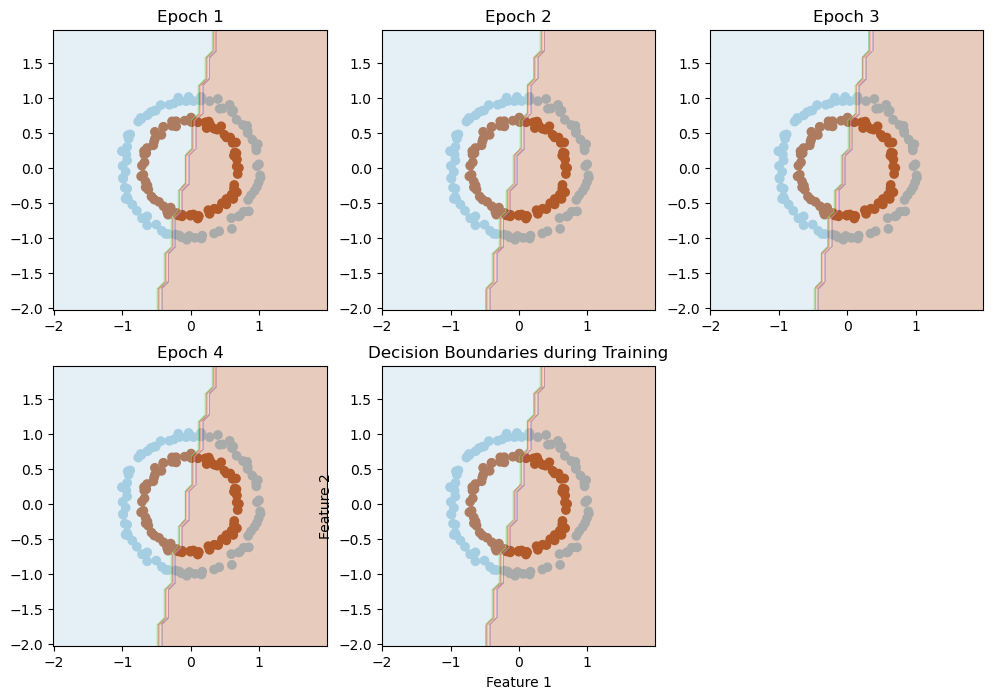

45.0


In [17]:

X = np.load('/Users/nasibhuseynzade/Desktop/Uni/Lab/circles_x.npy')
y = np.load('/Users/nasibhuseynzade/Desktop/Uni/Lab/circles_y.npy')

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

perceptron = Perceptron(learning_rate=0.1, epochs=5)
perceptron.train(X_train, y_train, plot_epochs=True)
preds= perceptron.predict(X_test)

accuracy = np.mean(preds == y_test) * 100
print(accuracy)

### Part 2

In this part, we will create a feed-forward neural network

- Load the MNIST classification dataset using sklearn. Split the data into train and test datasets (80-20 split).
- Implement a neural network with forward propagation and backpropagation **from scratch**.
- Use Stochastic Gradient Descent as the optimizer and Cross-entropy as Loss.
- You model class should be flexible in terms of
    - Number of layers
    - Number of hidder parameters.
    - Activation function for each layer (SoftMax, ReLU or tanh)
- Now create a training function that takes the neural network and training data as inputs and updates the weights of the network. This function should also take in the learning rate, number of epochs, and batchsize as input.
- Try out different hyperparameters to train your model and try to achieve >90% test accuracy. 

*Hints:*
- Flatten the MNIST data from 2D to 1D.
- Use *He weights initialization* for weights. *The He initialization calculates the starting weights as randomly generated matrices using a Gaussian probability distribution with a mean of 0.0 and a standard deviation of sqrt(2/n), where n is the number of inputs to the layer.*

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


mnist = fetch_openml('mnist_784', version=1)


X, y = mnist['data'], mnist['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

/Users/nasibhuseynzade/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


In [7]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_layers, output_size, activations):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.output_size = output_size
        self.activations = activations

        # Initialize weights and biases
        self.weights = [np.random.randn(input_size, hidden_layers[0])]
        self.biases = [np.zeros((1, hidden_layers[0]))]

        for i in range(len(hidden_layers) - 1):
            self.weights.append(np.random.randn(hidden_layers[i], hidden_layers[i + 1]))
            self.biases.append(np.zeros((1, hidden_layers[i + 1])))

        self.weights.append(np.random.randn(hidden_layers[-1], output_size))
        self.biases.append(np.zeros((1, output_size)))


    def relu(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, X):
        self.inputs = [X]
        self.outputs = []

        for i in range(len(self.weights)):
            z = np.dot(self.inputs[i], self.weights[i]) + self.biases[i]

            if self.activations[i] == 'softmax':
                output = self.softmax(z)
            elif self.activations[i] == 'relu':
                output = self.relu(z)
            elif self.activations[i] == 'tanh':
                output = self.tanh(z)

            self.outputs.append(output)
            self.inputs.append(output)

        return self.outputs[-1]

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), np.argmax(y_true, axis=1)])
        loss = np.sum(log_likelihood) / m
        return loss

    def backward(self, X, y_true, learning_rate):
        m = X.shape[0]

        # Calculate the gradient of the loss with respect to the output
        d_loss = self.outputs[-1] - y_true

        # Backpropagation
        for i in range(len(self.weights) - 1, -1, -1):
            d_activation = None

            if self.activations[i] == 'softmax':
                d_activation = self.outputs[i] * (1 - self.outputs[i])
            elif self.activations[i] == 'relu':
                d_activation = (self.outputs[i] > 0).astype(float)
            elif self.activations[i] == 'tanh':
                d_activation = 1 - np.power(self.outputs[i], 2)

            d_loss = d_loss * d_activation
            d_weights = np.dot(self.inputs[i].T, d_loss) / m
            d_biases = np.sum(d_loss, axis=0, keepdims=True) / m

          
            self.weights[i] -= learning_rate * d_weights
            self.biases[i] -= learning_rate * d_biases

            d_loss = np.dot(d_loss, self.weights[i].T)

    def train(self, X_train, y_train, epochs, learning_rate):
        for epoch in range(epochs):
            y_pred = self.forward(X_train)
            loss = self.cross_entropy_loss(y_train, y_pred)
            self.backward(X_train, y_train, learning_rate)

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")